In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("work_from_home_burnout_dataset.csv")

In [38]:
data.head(5)

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk,productivity_index,high_stress_days
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low,9.509906,False
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low,11.111111,False
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low,12.773376,False
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low,8.393285,False
4,1,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low,9.626973,False


# Data Cleaning and Manipulation

Missing value and data types verification

In [17]:
print(data.isnull().sum())

user_id                 0
day_type                0
work_hours              0
screen_time_hours       0
meetings_count          0
breaks_taken            0
after_hours_work        0
sleep_hours             0
task_completion_rate    0
burnout_score           0
burnout_risk            0
dtype: int64


In [19]:
print(data.dtypes)

user_id                   int64
day_type                 object
work_hours              float64
screen_time_hours       float64
meetings_count            int64
breaks_taken              int64
after_hours_work          int64
sleep_hours             float64
task_completion_rate    float64
burnout_score           float64
burnout_risk             object
dtype: object


Duplicate Detection

In [22]:
print(data.duplicated().sum())

0


Efficiency Metric 

In [29]:
data["productivity_index"]=(data["task_completion_rate"]/data["work_hours"])
data["productivity_index"]

0        9.509906
1       11.111111
2       12.773376
3        8.393285
4        9.626973
          ...    
1795    11.611374
1796    19.106383
1797    19.030612
1798     8.353863
1799    16.141553
Name: productivity_index, Length: 1800, dtype: float64

High Stress days indicator

In [32]:
data["high_stress_days"]=(data["work_hours"]>9) & (data["breaks_taken"]<2)
data["high_stress_days"]

0       False
1       False
2       False
3       False
4       False
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: high_stress_days, Length: 1800, dtype: bool

Categorization of Screen time

In [43]:
data["screen_usage"]=pd.cut(data["screen_time_hours"],bins=3,
                            labels = ["Low","Medium","High"])
data["screen_usage"]

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
1795       Low
1796       Low
1797       Low
1798    Medium
1799       Low
Name: screen_usage, Length: 1800, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

# Exploratory Data Analysis (EDA)

Summary Statistics of Burnout Score

In [66]:
print("\n Burnout Score Statistics:\n",data["burnout_score"].agg(["mean", "median", "std"]))


 Burnout Score Statistics:
 mean      44.009978
median    39.270000
std       23.881782
Name: burnout_score, dtype: float64


Sleep Hours: Low Risk vs High Risk Grouping

In [71]:
sleep_by_risk = data[data["burnout_risk"].isin(["Low","High"])].groupby("burnout_risk")["sleep_hours"].mean()
print("\n Avg Sleep by Risk Level \n",sleep_by_risk)


 Avg Sleep by Risk Level 
 burnout_risk
High    7.26100
Low     6.99738
Name: sleep_hours, dtype: float64


Meeting Intensity Impact (> 5 meetings)

In [85]:
high_mtgs = data[data["meetings_count"]>5]["burnout_score"].mean()
low_mtgs = data[data["meetings_count"]<=5]["burnout_score"].mean()
print("\n High meetings avg burnout \n",high_mtgs)
print("\n Low meetings avg burnout \n",low_mtgs)


 High meetings avg burnout 
 48.00661971830986

 Low meetings avg burnout 
 43.84585887796415


After-Hours Impact on Task Completion Rate

In [90]:
print("\n Completion Rate vs After Hours: \n", data.groupby("after_hours_work")["task_completion_rate"].mean())


 Completion Rate vs After Hours: 
 after_hours_work
0    72.684489
1    71.636997
Name: task_completion_rate, dtype: float64


Pearson Correlation (Screen Time vs Burnout)

In [95]:
corr = np.corrcoef(data["screen_time_hours"],data["burnout_score"])
print("\n Pearson Correlation (Screen Time vs Burnout) \n", corr)


 Pearson Correlation (Screen Time vs Burnout) 
 [[1.         0.12263567]
 [0.12263567 1.        ]]


In [97]:
data

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk,productivity_index,high_stress_days,screen_usage
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low,9.509906,False,Medium
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low,11.111111,False,Medium
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low,12.773376,False,Medium
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low,8.393285,False,Medium
4,1,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low,9.626973,False,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,180,Weekend,6.33,8.16,0,4,0,5.59,73.5,31.91,Low,11.611374,False,Low
1796,180,Weekend,4.70,7.88,0,4,0,6.69,89.8,26.30,Low,19.106383,False,Low
1797,180,Weekend,3.92,6.39,2,1,0,6.77,74.6,34.07,Low,19.030612,False,Low
1798,180,Weekday,8.93,11.11,2,5,0,8.28,74.6,38.14,Low,8.353863,False,Medium


# Data Visualization

Distribution Visualization of Burnout Score

Text(0.5, 1.0, 'Distribution Visualization of Burnout Score')

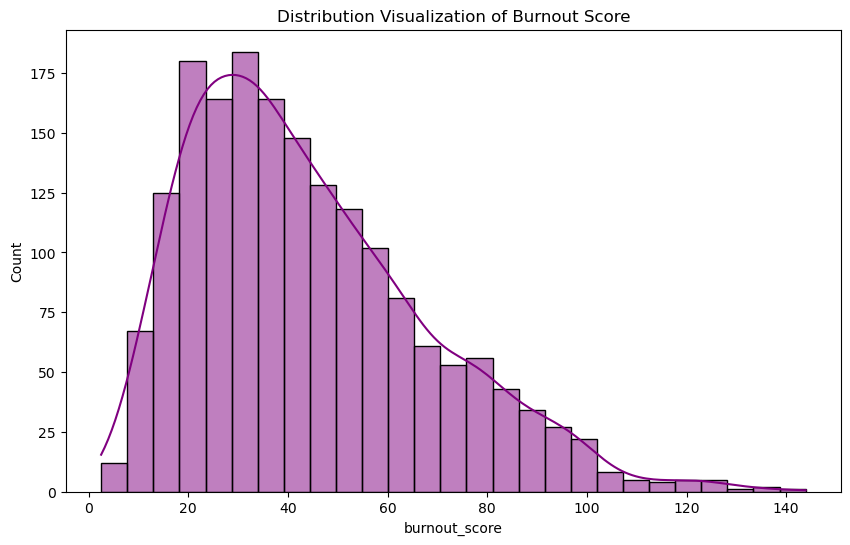

In [103]:
plt.figure(figsize=(10,6))
sns.histplot(data["burnout_score"],kde=True, color ="purple")
plt.title("Distribution Visualization of Burnout Score")

The Weekend Effect (Boxplot of Work Hours)

Text(0.5, 1.0, 'Work Hours: Weekend vs Weekday')

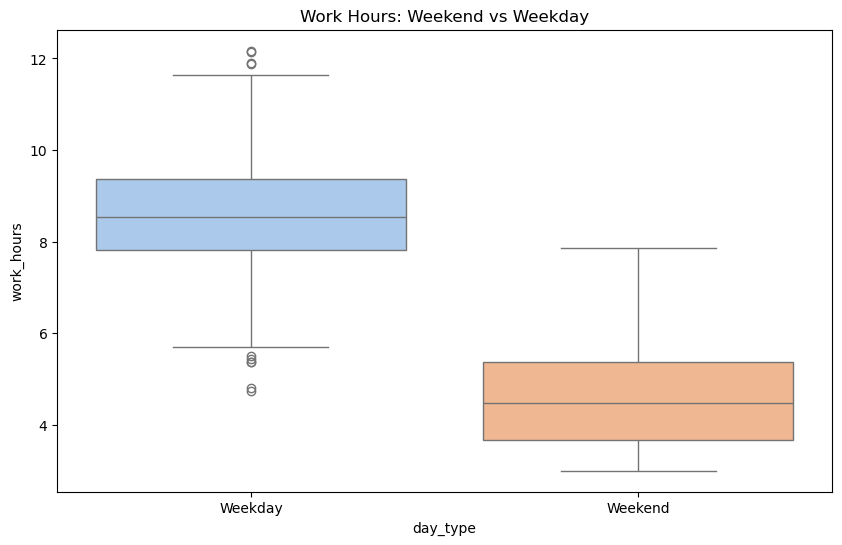

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(x="day_type",y="work_hours",data=data, palette = "pastel", hue = "day_type", legend=False)
plt.title("Work Hours: Weekend vs Weekday")

Trend Discovery (Sleep vs Burnout Scatter + Regression)

Text(0.5, 1.0, 'Sleep Hours vs Burnout Score Trend')

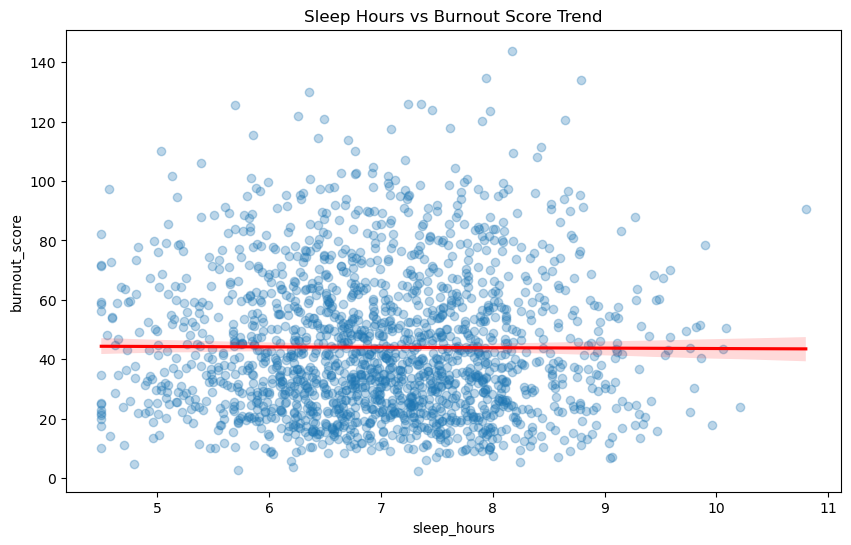

In [119]:
plt.figure(figsize=(10,6))
sns.regplot(x="sleep_hours", y="burnout_score", data=data, scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("Sleep Hours vs Burnout Score Trend")

Segmental Analysis (Total Meetings per Risk category)

<Axes: xlabel='burnout_risk', ylabel='meetings_count'>

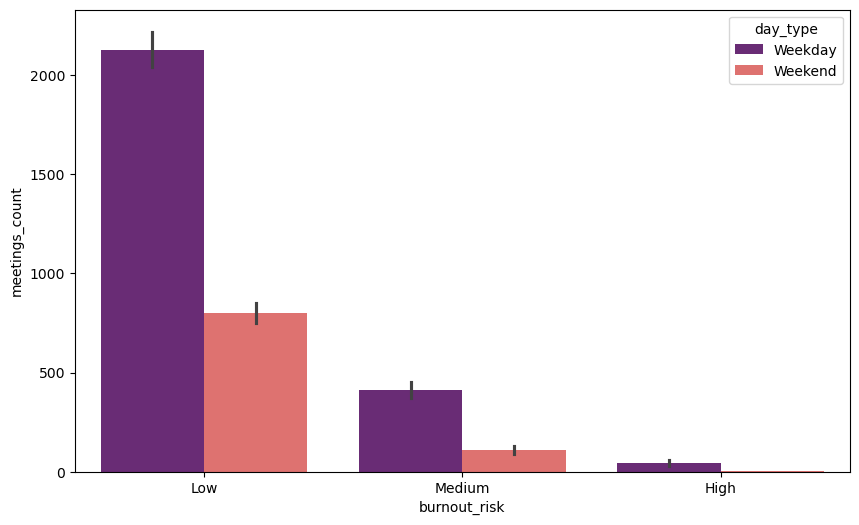

In [125]:
plt.figure(figsize=(10,6))
sns.barplot(x="burnout_risk" ,y="meetings_count", hue = "day_type",data=data, estimator=np.sum, palette="magma")

System-wide Correlation Heatmap

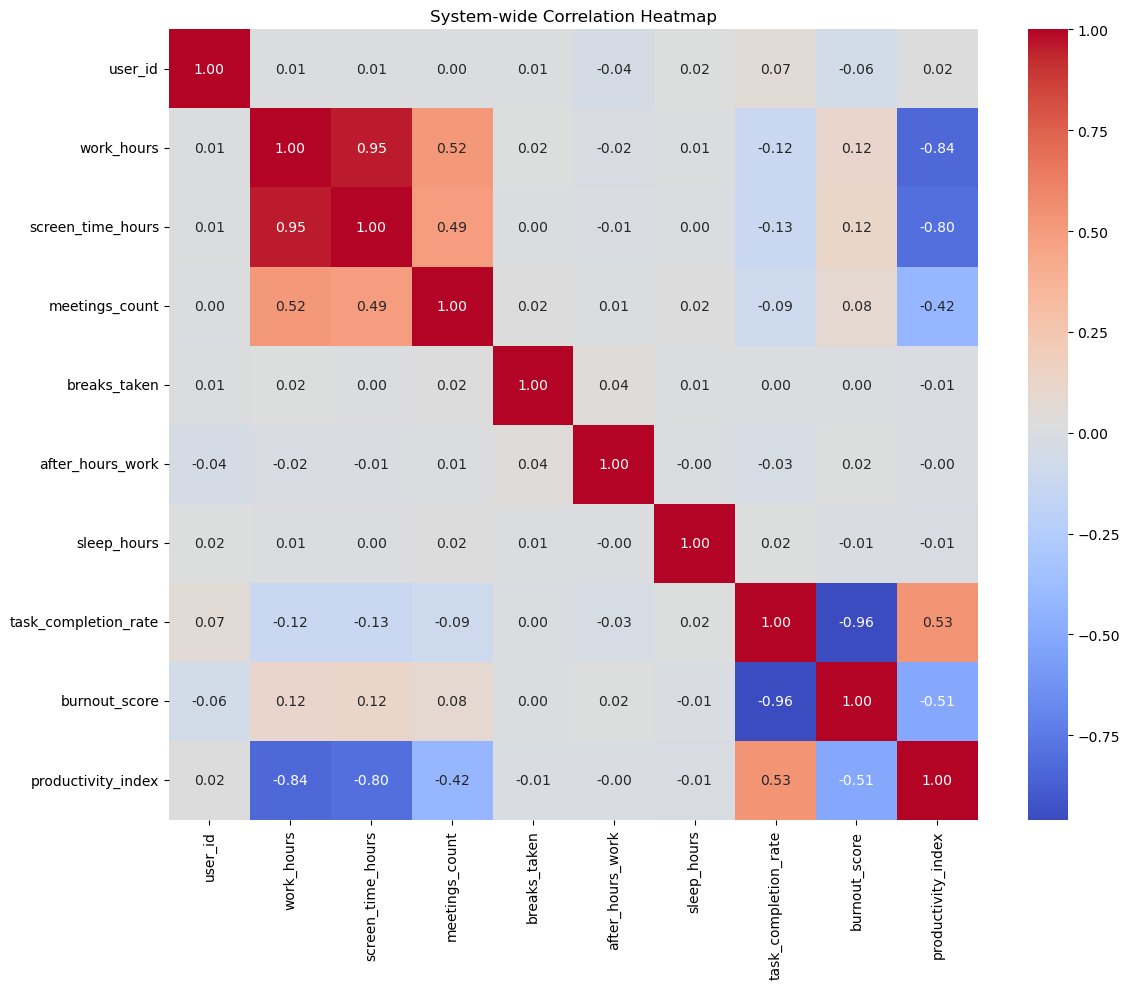

In [128]:
plt.figure(figsize=(12,10))
numeric_df = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("System-wide Correlation Heatmap")
plt.tight_layout()

In [130]:
data.to_csv('burnout_final_project_data.csv', index=False)